# This files runs the entire calibration pipeline for the pa1 debug-a dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import DataIO as io
import LinAlg as LA
import PivotCalibration as PC
import Debug

## LINUX PATHS

In [2]:
#NOTE RUN THESE FOR A LINUX MACHINE 
calbody_filepath = './PA_1_Data/pa1-debug-a-calbody.txt'
calreadings_filepath = './PA_1_Data/pa1-debug-a-calreadings.txt'
empivot_filepath = './PA_1_Data/pa1-debug-a-empivot.txt'
optpivot_filepath = './PA_1_Data/pa1-debug-a-optpivot.txt'

output_filepath = './PA_1_Data/pa1-debug-a-output1.txt'


## WINDOWS PATHS

In [3]:
#NOTE RUN THESE FOR A WINDOWS MACHINE 
#calbody_filepath = r'.\PA_1_Data\pa1-debug-a-calbody.txt'
#calreadings_filepath = r'.\PA_1_Data\pa1-debug-a-calreadings.txt'
#empivot_filepath = r'.\PA_1_Data\pa1-debug-a-empivot.txt'
#optpivot_filepath = r'.\PA_1_Data\pa1-debug-a-optpivot.txt'

#output_filepath = r'.\PA_1_Data\pa1-debug-a-output1.txt'

# 4.a Compute FD 
the transformation from the optical tracker to the EM tracker \
eg: D_j = FD \cdot d_j

d_i Vectors (Optical Markers on base of EM Tracker, wrt EM tracker):

Vector(0.00, 0.00, 0.00)

Vector(0.00, 0.00, 150.00)

Vector(0.00, 150.00, 0.00)

Vector(0.00, 150.00, 150.00)

Vector(150.00, 0.00, 0.00)

Vector(150.00, 0.00, 150.00)

Vector(150.00, 150.00, 0.00)

Vector(150.00, 150.00, 150.00)

a_i Vectors (Optical Markers on Calibration Object, wrt Calibration Object):
Vector(0.00, 0.00, 0.00)
Vector(0.00, 0.00, 250.00)
Vector(0.00, 250.00, 0.00)
Vector(0.00, 250.00, 250.00)
Vector(250.00, 0.00, 0.00)
Vector(250.00, 0.00, 250.00)
Vector(250.00, 250.00, 0.00)
Vector(250.00, 250.00, 250.00)

c_i Vectors (EM Markers on Calibration Object, wrt Calibration Object):
Vector(0.00, 0.00, 0.00)
Vector(0.00, 0.00, 125.00)
Vector(0.00, 0.00, 250.00)
Vector(0.00, 125.00, 0.00)
Vector(0.00, 125.00, 125.00)
Vector(0.00, 125.00, 250.00)
Vector(0.00, 250.00, 0.00)
Vector(0.00, 250.00, 125.00)
Vector(0.00, 250.00, 250.00)
Vector(125.00, 0.00, 0.00)
Vector(125.00, 0.00, 125.00)
Vector(125.00, 0.00

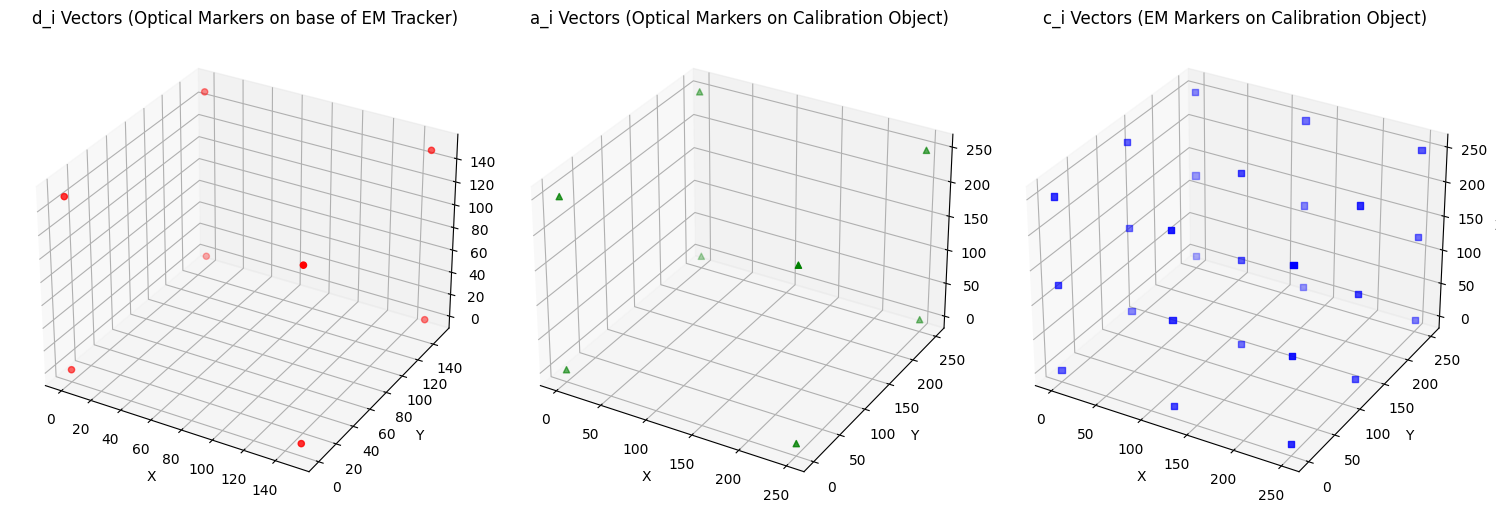

In [4]:
d_vectors, a_vectors, c_vectors, N_D, N_A, N_C = io.read_calbody_file(calbody_filepath)

# Output the vectors
print("d_i Vectors (Optical Markers on base of EM Tracker, wrt EM tracker):")
for vec in d_vectors:
    print()
    print(vec)
assert len(d_vectors) == N_D

print("\na_i Vectors (Optical Markers on Calibration Object, wrt Calibration Object):")
for vec in a_vectors:
    print(vec)
assert len(a_vectors) == N_A

print("\nc_i Vectors (EM Markers on Calibration Object, wrt Calibration Object):")
for vec in c_vectors:
    print(vec)
assert len(c_vectors) == N_C

LA.visualize_vectors(d_vectors, a_vectors, c_vectors)

In [5]:
frames_data = io.read_calreadings_file(calreadings_filepath)

# Output the vectors for each frame
for frame_num, frame_data in frames_data.items():
    print(f"Frame {frame_num}:")

    print("  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):")
    for vec in frame_data['D_vectors']:
        print(f"    {vec}")

    print("  A_i Vectors (Optical Markers on Calibration Object, wrt Optical Tracker ):")
    for vec in frame_data['A_vectors']:
        print(f"    {vec}")

    print("  C_i Vectors (EM Markers on Calibration Object, wrt EM tracker):")
    for vec in frame_data['C_vectors']:
        print(f"    {vec}")

Frame 1:
  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):
    Vector(0.00, 0.00, -1500.00)
    Vector(0.00, 0.00, -1350.00)
    Vector(0.00, 150.00, -1500.00)
    Vector(0.00, 150.00, -1350.00)
    Vector(150.00, 0.00, -1500.00)
    Vector(150.00, 0.00, -1350.00)
    Vector(150.00, 150.00, -1500.00)
    Vector(150.00, 150.00, -1350.00)
  A_i Vectors (Optical Markers on Calibration Object, wrt Optical Tracker ):
    Vector(209.30, 208.87, -1288.97)
    Vector(205.19, 207.84, -1039.00)
    Vector(211.50, 458.85, -1287.91)
    Vector(207.39, 457.83, -1037.95)
    Vector(459.26, 206.65, -1284.87)
    Vector(455.15, 205.63, -1034.91)
    Vector(461.45, 456.64, -1283.81)
    Vector(457.35, 455.62, -1033.85)
  C_i Vectors (EM Markers on Calibration Object, wrt EM tracker):
    Vector(209.30, 208.87, 211.03)
    Vector(207.25, 208.35, 336.01)
    Vector(205.19, 207.84, 461.00)
    Vector(210.40, 333.86, 211.56)
    Vector(208.35, 333.35, 336.54)
    Vector(206.29, 332.84, 46

In [6]:
print("D_1")
for vec in frames_data[1]['D_vectors']:
    print(vec)

print("d_i")
for vec in d_vectors:
    print(vec)

# for frame_num, frame_data in frames_data.items():
    # Debug.plot_original_vs_transformed(d_vectors, frame_data['D_vectors']) 

D_1
Vector(0.00, 0.00, -1500.00)
Vector(0.00, 0.00, -1350.00)
Vector(0.00, 150.00, -1500.00)
Vector(0.00, 150.00, -1350.00)
Vector(150.00, 0.00, -1500.00)
Vector(150.00, 0.00, -1350.00)
Vector(150.00, 150.00, -1500.00)
Vector(150.00, 150.00, -1350.00)
d_i
Vector(0.00, 0.00, 0.00)
Vector(0.00, 0.00, 150.00)
Vector(0.00, 150.00, 0.00)
Vector(0.00, 150.00, 150.00)
Vector(150.00, 0.00, 0.00)
Vector(150.00, 0.00, 150.00)
Vector(150.00, 150.00, 0.00)
Vector(150.00, 150.00, 150.00)


In [7]:
F_D_point_cloud = LA.perform_calibration_registration_for_frames(frames_data, d_vectors, vector_type='D')

rmse_results = {}

# Loop through each frame in the point cloud registration results
for frame_num, frame in F_D_point_cloud.items():
    # Extract the source points (calbody d_vectors) for transformation
    d_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in d_vectors]  # Source points (d_vectors)

    # Extract the target points (D_points) from calreadings_frames
    D_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in frames_data[frame_num]['D_vectors']]  # Target points

    # Apply the transformation to d_points
    transformed_d_points = LA.transform_points(frame, d_points)

    # Compute the RMSE between the transformed d_points and D_points
    transformed_array = np.array([v.as_array() for v in transformed_d_points])
    target_array = np.array([v.as_array() for v in D_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse

    # Output the RMSE result
    print(f"Frame {frame_num} RMSE: {rmse}")
    print(f"Frame {frame_num} Transformation Matrix (R):", frame.rotation)
    print(f"Frame {frame_num} Translation Vector (t):", frame.translation)
    # Plot the transformed d_points vs target D_points
    # LA.plot_3d_transformed_vs_target(frame_num, transformed_d_points, D_points)

Frame 1 RMSE: 0.0
Frame 1 Transformation Matrix (R): [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 1 Translation Vector (t): [    0.     0. -1500.]
Frame 2 RMSE: 0.0
Frame 2 Transformation Matrix (R): [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 2 Translation Vector (t): [    0.     0. -1500.]
Frame 3 RMSE: 0.0
Frame 3 Transformation Matrix (R): [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 3 Translation Vector (t): [    0.     0. -1500.]
Frame 4 RMSE: 0.0
Frame 4 Transformation Matrix (R): [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 4 Translation Vector (t): [    0.     0. -1500.]
Frame 5 RMSE: 0.0
Frame 5 Transformation Matrix (R): [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 5 Translation Vector (t): [    0.     0. -1500.]
Frame 6 RMSE: 0.0
Frame 6 Transformation Matrix (R): [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 6 Translation Vector (t): [    0.     0. -1500.]
Frame 7 RMSE: 0.0
Frame 7 Transformation Matrix (R): [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 7 Translation Vector (t): [    0. 

# 4.b Compute F_A 
Transformation from the optical tracker to calibration object

In [8]:
F_A_point_cloud = LA.perform_calibration_registration_for_frames(frames_data, a_vectors, vector_type='A')

rmse_results = {}

# Loop through each frame in the point cloud registration results
for frame_num, frame in F_A_point_cloud.items():
    # Extract the source points (calbody a_vectors) for transformation
    a_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in a_vectors]  # Source points (a_vectors)

    # Extract the target points (A_points) from calreadings_frames
    A_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in frames_data[frame_num]['A_vectors']]  # Target points

    # Apply the transformation to a_points
    transformed_a_points = LA.transform_points(frame, a_points)

    # Compute the RMSE between the transformed a_points and A_points
    transformed_array = np.array([v.as_array() for v in transformed_a_points])
    target_array = np.array([v.as_array() for v in A_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse

    # Output the RMSE result
    print(f"Frame {frame_num} RMSE: {rmse}")
    print(f"Frame {frame_num} Transformation Matrix (R):", frame.rotation)
    print(f"Frame {frame_num} Translation Vector (t):", frame.translation)
    # Plot the transformed a_points vs target A_points
    # LA.plot_3d_transformed_vs_target(frame_num, transformed_a_points, A_points)

Frame 1 RMSE: 0.0026154008228331804
Frame 1 Transformation Matrix (R): [[ 0.99982644  0.00878584 -0.01642831]
 [-0.00885411  0.99995245 -0.00408762]
 [ 0.01639162  0.00423237  0.99985669]]
Frame 1 Translation Vector (t): [  209.3007572    208.86490927 -1288.96883709]
Frame 2 RMSE: 0.0017889967421069741
Frame 2 Transformation Matrix (R): [[ 0.99978401 -0.01937515  0.00751895]
 [ 0.01940508  0.99980399 -0.00392741]
 [-0.00744138  0.00407247  0.99996402]]
Frame 2 Translation Vector (t): [  208.65152596   210.62979217 -1051.3393803 ]
Frame 3 RMSE: 0.0022094156593084335
Frame 3 Transformation Matrix (R): [[ 0.99973035 -0.02309864 -0.00238233]
 [ 0.02312162  0.99968145  0.01011886]
 [ 0.00214784 -0.01017122  0.99994597]]
Frame 3 Translation Vector (t): [  211.23633108   451.75976586 -1289.5065894 ]
Frame 4 RMSE: 0.0021385112777352333
Frame 4 Transformation Matrix (R): [[ 0.99969751  0.01818196 -0.01656198]
 [-0.01769821  0.99942559  0.02890108]
 [ 0.01707794 -0.02859922  0.99944506]]
Frame 4

# 4.c Compute C_expected

Calculate C_expected from F D inverse, F A, and c_i




In [9]:
F_A_point_cloud = LA.perform_calibration_registration_for_frames(frames_data, a_vectors, vector_type='A')

F_D_point_cloud = LA.perform_calibration_registration_for_frames(frames_data, d_vectors, vector_type='D')

#Loop over to compute C expected for each frame 
counter = 1
C_expected_vectors = {}
transformed_c_vectors = []
for count in range(1, 9):
    for c_vec in c_vectors:
        transformed_c_vectors.append(F_D_point_cloud[count].inv() @ F_A_point_cloud[count] @ c_vec)
    C_expected_vectors[count] = transformed_c_vectors 
    transformed_c_vectors = []

# 4.d Output the C_expected to Output-1.txt

Output vectors to text file




In [10]:
# Calculate NC (number of C vectors) and Nframes (number of frames)
Nframes = len(C_expected_vectors)
NC = len(next(iter(C_expected_vectors.values())))  # Assuming each frame has the same number of vectors

# Define the output file path
output_file = 'output-1.txt'

# Open the output file for writing
with open(output_file, 'w') as file:
    # Write the header as specified, including NC and Nframes on the same line as NAME-OUTPUT-1.TXT
    #file.write("NAME-OUTPUT-1.TXT\n")
    #file.write("NH\nLINE\nData\n1\n")
    file.write(f"{NC}, {Nframes}, NAME-OUTPUT-1.TXT\n")
    #file.write("Number of EM markers on cal object, number of 'data frames' of data, file name\n")
    file.write("Px, Py, Pz\n") #TODO: FILL IN WITH 5 & 6
    file.write("Px, Py, Pz\n") #TODO: FILL IN WITH 5 & 6

    # Write the coordinates of C_expected for each frame
    for frame_num, vectors in C_expected_vectors.items():
        for vector in vectors:
            # Output format for each coordinate set: x_i, y_i, z_i
            file.write(f"{vector.coords[0]}, {vector.coords[1]}, {vector.coords[2]}\n")


# Q5. Find P_dimple of EM tracker

In [11]:
em_frames_data, N_G, N_frames  = io.read_empivot_file(empivot_filepath)


In [12]:
# Output the vectors for each frame
for frame_num, frame_data in em_frames_data.items():
    print(f"Frame {frame_num}:")

    print("  G_i Vectors (EM Markers on EM Tracker):")
    for vec in frame_data["G_vectors"]:
        print(f"    {vec}")


Frame 1:
  G_i Vectors (EM Markers on EM Tracker):
    Vector(198.56, 260.57, 207.38)
    Vector(215.48, 304.42, 190.33)
    Vector(232.40, 348.27, 173.28)
    Vector(216.37, 241.83, 176.85)
    Vector(233.28, 285.68, 159.80)
    Vector(250.20, 329.53, 142.75)
Frame 2:
  G_i Vectors (EM Markers on EM Tracker):
    Vector(215.03, 210.47, 161.30)
    Vector(243.55, 229.48, 124.90)
    Vector(272.07, 248.49, 88.49)
    Vector(223.11, 242.24, 184.22)
    Vector(251.63, 261.25, 147.82)
    Vector(280.16, 280.25, 111.42)
Frame 3:
  G_i Vectors (EM Markers on EM Tracker):
    Vector(201.98, 239.82, 250.58)
    Vector(225.94, 275.11, 276.66)
    Vector(249.90, 310.40, 302.74)
    Vector(227.04, 245.46, 219.92)
    Vector(251.00, 280.75, 246.00)
    Vector(274.96, 316.05, 272.08)
Frame 4:
  G_i Vectors (EM Markers on EM Tracker):
    Vector(224.92, 239.55, 235.28)
    Vector(267.81, 254.41, 256.23)
    Vector(310.71, 269.27, 277.18)
    Vector(241.97, 204.87, 224.95)
    Vector(284.87, 219.73, 

In [13]:
G0_vectors = LA.compute_centroid_vectors(em_frames_data, vector_type='G')

print("G0 Vectors (Centroids of G_vectors for each frame):")
for idx, vec in enumerate(G0_vectors):
    print(f"  Frame {idx + 1}: {vec}")

G0 Vectors (Centroids of G_vectors for each frame):
  Frame 1: Vector(224.38, 295.05, 175.06)
  Frame 2: Vector(247.59, 245.36, 136.36)
  Frame 3: Vector(238.47, 277.93, 261.33)
  Frame 4: Vector(276.34, 237.07, 251.07)
  Frame 5: Vector(201.20, 305.57, 193.72)
  Frame 6: Vector(122.70, 198.33, 136.25)
  Frame 7: Vector(209.52, 257.06, 293.83)
  Frame 8: Vector(281.21, 231.19, 243.97)
  Frame 9: Vector(209.22, 296.51, 167.93)
  Frame 10: Vector(278.82, 250.69, 191.03)
  Frame 11: Vector(263.90, 204.46, 277.06)
  Frame 12: Vector(280.87, 247.91, 195.11)


In [14]:
em_frames_data[1]

{'G_vectors': [<LinAlg.Vector at 0x7fb0d16a0ee0>,
  <LinAlg.Vector at 0x7fb0b14e58e0>]}

In [15]:
g_i_vectors = LA.compute_local_marker_vectors(em_frames_data, vector_type='G')

In [16]:
for frame_num, frame_data in em_frames_data.items():
    frame_data["G_vectors"]

In [17]:
F_G_frames = {}

# Loop over the keys (frames) in em_frames_data and g_i_vectors
for frame_num in em_frames_data:
    # Get the vectors for the current frame from em_frames_data and g_i_vectors
    em_frames_data_frame = {frame_num: em_frames_data[frame_num]}

    # Call the function with the modified arguments
    result = LA.perform_calibration_registration_for_frames(em_frames_data_frame, g_i_vectors, vector_type='G')

    # Store the result in the registration_results dictionary
    F_G_frames.update(result)


In [18]:
F_G = np.array([np.array(frame) for frame in F_G_frames.values()])
t_G, p_pivot = PC.pivot_calibration(F_G, G0_vectors)
p_pivot

array([190.54563896, 207.34530725, 209.16654403])

In [19]:
t_G

array([-33.83700086, -87.70548283,  34.10269787])

# Q6

In [20]:
opt_frames_data, N_D, N_H, N_frames  = io.read_optpivot_file(optpivot_filepath)

Visualize data

In [21]:
# Output the vectors for each frame
for frame_num, frame_data in opt_frames_data.items():
    print(f"Frame {frame_num}:")

    print("  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):")
    for vec in frame_data['D_vectors']:
        print(f"    {vec}")

    print("  H_i Vectors (OPT Markers on probe, wrt Optical tracker):")
    for vec in frame_data['H_vectors']:
        print(f"    {vec}")

Frame 1:
  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):
    Vector(0.00, 0.00, -1500.00)
    Vector(0.00, 0.00, -1350.00)
    Vector(0.00, 150.00, -1500.00)
    Vector(0.00, 150.00, -1350.00)
    Vector(150.00, 0.00, -1500.00)
    Vector(150.00, 0.00, -1350.00)
    Vector(150.00, 150.00, -1500.00)
    Vector(150.00, 150.00, -1350.00)
  H_i Vectors (OPT Markers on probe, wrt Optical tracker):
    Vector(394.46, 456.85, -1286.87)
    Vector(411.79, 502.92, -1278.09)
    Vector(429.13, 548.99, -1269.31)
    Vector(441.33, 439.52, -1288.48)
    Vector(458.67, 485.58, -1279.70)
    Vector(476.01, 531.65, -1270.92)
Frame 2:
  D_i Vectors (Optical Markers on EM tracker, wrt Optical Tracker):
    Vector(0.00, 0.00, -1500.00)
    Vector(0.00, 0.00, -1350.00)
    Vector(0.00, 150.00, -1500.00)
    Vector(0.00, 150.00, -1350.00)
    Vector(150.00, 0.00, -1500.00)
    Vector(150.00, 0.00, -1350.00)
    Vector(150.00, 150.00, -1500.00)
    Vector(150.00, 150.00, -1350.00)
  H_i

Find H0

In [22]:
H0_vectors = LA.compute_centroid_vectors(opt_frames_data, vector_type='H')

print("H0 Vectors (Centroids of H_vectors for each frame):")
for idx, vec in enumerate(H0_vectors):
    print(f"  Frame {idx + 1}: {vec}")

H0 Vectors (Centroids of H_vectors for each frame):
  Frame 1: Vector(435.23, 494.25, -1278.90)
  Frame 2: Vector(446.56, 432.42, -1379.92)
  Frame 3: Vector(458.84, 405.61, -1215.28)
  Frame 4: Vector(465.71, 388.82, -1371.15)
  Frame 5: Vector(433.86, 450.57, -1377.35)
  Frame 6: Vector(445.29, 470.54, -1238.88)
  Frame 7: Vector(440.33, 481.04, -1249.67)
  Frame 8: Vector(497.80, 394.06, -1318.32)
  Frame 9: Vector(355.78, 477.43, -1344.66)
  Frame 10: Vector(361.63, 365.44, -1380.96)
  Frame 11: Vector(440.95, 484.29, -1336.65)
  Frame 12: Vector(300.84, 400.14, -1289.10)


Find h_i for each frame

In [23]:
hi_vectors = LA.compute_local_marker_vectors(opt_frames_data, vector_type='H')
    

In [24]:
F_D_opt_point_cloud = LA.perform_calibration_registration_for_frames(opt_frames_data, d_vectors, vector_type='D')

rmse_results = {}

# Loop through each frame in the point cloud registration results
for frame_num, frame in F_D_opt_point_cloud.items():
    # Extract the source points (calbody d_vectors) for transformation
    d_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in d_vectors]  # Source points (d_vectors)

    # Extract the target points (D_points) from calreadings_frames
    D_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in opt_frames_data [frame_num]['D_vectors']]  # Target points

    # Apply the transformation to d_points
    transformed_d_points = LA.transform_points(frame, d_points)

    # Compute the RMSE between the transformed d_points and D_points
    transformed_array = np.array([v.as_array() for v in transformed_d_points])
    target_array = np.array([v.as_array() for v in D_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse

    # Output the RMSE result
    print(f"Frame {frame_num} RMSE: {rmse}")
    print(f"Frame {frame_num} Transformation Matrix (R): \n", frame.rotation)
    print(f"Frame {frame_num} Translation Vector (t): \n", frame.translation)
    # Plot the transformed d_points vs target D_points
    # LA.plot_3d_transformed_vs_target(frame_num, transformed_d_points, D_points)

Frame 1 RMSE: 0.0
Frame 1 Transformation Matrix (R): 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 1 Translation Vector (t): 
 [    0.     0. -1500.]
Frame 2 RMSE: 0.0
Frame 2 Transformation Matrix (R): 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 2 Translation Vector (t): 
 [    0.     0. -1500.]
Frame 3 RMSE: 0.0
Frame 3 Transformation Matrix (R): 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 3 Translation Vector (t): 
 [    0.     0. -1500.]
Frame 4 RMSE: 0.0
Frame 4 Transformation Matrix (R): 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 4 Translation Vector (t): 
 [    0.     0. -1500.]
Frame 5 RMSE: 0.0
Frame 5 Transformation Matrix (R): 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 5 Translation Vector (t): 
 [    0.     0. -1500.]
Frame 6 RMSE: 0.0
Frame 6 Transformation Matrix (R): 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 6 Translation Vector (t): 
 [    0.     0. -1500.]
Frame 7 RMSE: 0.0
Frame 7 Transformation Matrix (R): 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Frame 7 Transl

In [25]:
F_H_opt_point_cloud = LA.perform_pivot_registration_for_frames(opt_frames_data, hi_vectors, vector_type='H')

rmse_results = {}

# Loop through each frame in the point cloud registration results
for frame_num, frame in F_H_opt_point_cloud.items():
    # Extract the source points (calbody hi_vectors) for transformation
    hi_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in hi_vectors]  # Source points (hi_vectors)

    # Extract the target points (H_points) from calreadings_frames
    H_points = [LA.Vector(vec.coords[0], vec.coords[1], vec.coords[2]) for vec in opt_frames_data [frame_num]['H_vectors']]  # Target points

    # Apply the transformation to hi_points
    transformed_h_points = LA.transform_points(frame, hi_points)

    # Compute the RMSE between the transformed hi_points and H_points
    transformed_array = np.array([v.as_array() for v in transformed_h_points])
    target_array = np.array([v.as_array() for v in H_points])
    rmse = LA.compute_rmse(transformed_array, target_array)
    rmse_results[frame_num] = rmse

    # Output the RMSE result
    print(f"Frame {frame_num} RMSE: {rmse}")
    print(f"Frame {frame_num} Transformation Matrix (R): \n", frame.rotation)
    print(f"Frame {frame_num} Translation Vector (t): \n", frame.translation)
    # Plot the transformed d_points vs target H_points
    # LA.plot_3d_transformed_vs_target(frame_num, transformed_d_points, D_points)

Frame 1 RMSE: 0.0
Frame 1 Transformation Matrix (R): 
 [[ 1.00000000e+00 -1.32157552e-23  3.08834627e-23]
 [ 1.32157552e-23  1.00000000e+00 -1.25172662e-23]
 [-3.08834627e-23  1.25172662e-23  1.00000000e+00]]
Frame 1 Translation Vector (t): 
 [  435.23165894   494.25170898 -1278.89501953]
Frame 2 RMSE: 0.0046984185464680195
Frame 2 Transformation Matrix (R): 
 [[ 0.71331158  0.34693096 -0.60895443]
 [ 0.66563403 -0.06340837  0.74357966]
 [ 0.219358   -0.93574478 -0.27615898]]
Frame 2 Translation Vector (t): 
 [  446.55668531   432.41997369 -1379.92003794]
Frame 3 RMSE: 0.003935144282877445
Frame 3 Transformation Matrix (R): 
 [[ 0.68799582  0.47778199 -0.54624731]
 [-0.72484261  0.41551639 -0.54949915]
 [-0.03556609  0.77399645  0.63219029]]
Frame 3 Translation Vector (t): 
 [  458.83835669   405.61504095 -1215.27996961]
Frame 4 RMSE: 0.0029737723525613546
Frame 4 Transformation Matrix (R): 
 [[ 0.44066335  0.38693951  0.80999606]
 [-0.89416186  0.10948071  0.43415267]
 [ 0.07931188 -0

In [26]:
F_D_inv = {}

for frame_num in F_D_opt_point_cloud:
    frame_D_inv = F_D_opt_point_cloud[frame_num].inv()
    F_D_inv[frame_num] = frame_D_inv

F_DH_opt_point_cloud = LA.combine_point_cloud_frames(F_D_inv, F_H_opt_point_cloud)

t_H, p_dimple_H = PC.solve_for_pointer_and_dimple(F_DH_opt_point_cloud)

print(t_H)
print(p_dimple_H)

[[-34.67724819]
 [-92.13667338]
 [-17.56194536]]
[[400.55051165]
 [402.11558362]
 [203.53917082]]
